# Upper Confidence Bound

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

## Implementing UCB

In [8]:
import math


N = 600  # Total number of rounds
d = 10  # Total number of Ads
ads_selected = []  # List containing indexes of ads selected in each round
numbers_of_selection = [0] * d  # Number of times ad i was selected up to round n
sums_of_rewards = [0] * d  # The sum of rewards of the ad i up to round n
total_rewards = 0  # Total accumulated rewards

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if numbers_of_selection[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selection[i]
            delta_i = math.sqrt((3 / 2) * (math.log(n + 1) / numbers_of_selection[i]))
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selection[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_rewards += reward

## Visualizing the results

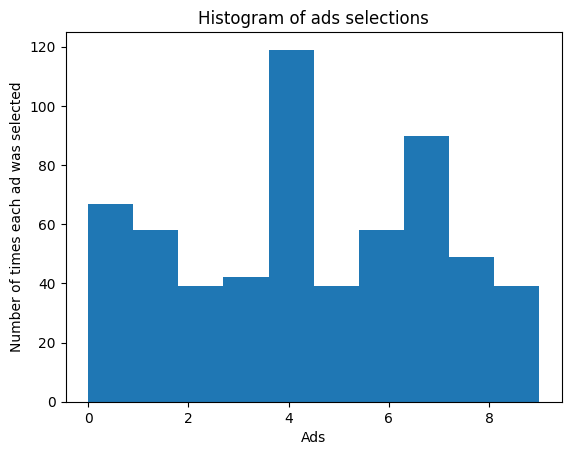

In [9]:
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()